In [1]:
#Displaying and importing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling
from imblearn.over_sampling import SMOTE

# Classification
from sklearn.metrics import balanced_accuracy_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier




In [2]:
X_train =  pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test =  pd.read_csv("X_test.csv", delimiter=",", index_col='id')

X_train.describe()
y_train.head()

,id,y
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 1001 entries, id to x999
dtypes: float64(1001)
memory usage: 36.7 MB


In [4]:
#no value has std = 0
X_train.std()[X_train.std() == 0]

Series([], dtype: float64)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


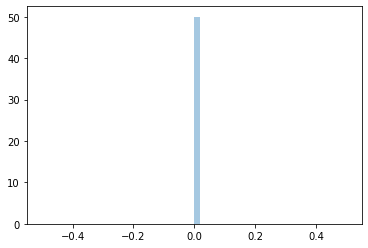

In [5]:
#Number of null values per row : no null values
is_null_row = X_train.isnull().sum(axis=1)
is_null_row.sort_values(inplace=True, ascending=False)
sns.distplot(np.asarray(is_null_row))

In [6]:
#Number of null values per feature -> no null values
is_null_count = X_train.isnull().sum() / len(X_train)*100
is_null_data = is_null_count[is_null_count>0]
is_null_data.sort_values(inplace=True, ascending=False)
print(X_train.shape)
X_train_wt_null = X_train.dropna()
print(X_train_wt_null.shape)

(4800, 1001)
(4800, 1001)


### Outlier detection

### Feature Selection

In [7]:
### Data balancing : Equilibrating classes

In [8]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(X_train, y_train['y'])

### Multiclass classification starts here

In [9]:
# divide datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train.drop(columns='id'), y_train, test_size=0.33, random_state=5)

##### One-Vs-The-Rest classification (multiclass learning)

In [10]:
oneVsRest_classifier = OneVsRestClassifier(LinearSVC(random_state=0,max_iter=8000))
oneVsRest_classifier.fit(x_train, y_train)
y_train_pred_1vr = oneVsRest_classifier.predict(x_train)
y_test_pred_1vr = oneVsRest_classifier.predict(x_test)

print(balanced_accuracy_score(y_test, y_test_pred_1vr))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9290057456908661


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### One-Vs-One classification

In [11]:
oneVsOne_classifier = OneVsOneClassifier(LinearSVC(random_state=0,max_iter=8000))
oneVsOne_classifier.fit(x_train, y_train)
y_train_pred_1v1 = oneVsOne_classifier.predict(x_train)
y_test_pred_1v1 = oneVsOne_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_1v1))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9403906417086855


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### Error-Correcting Output-Codes

In [12]:
code_classifier = OutputCodeClassifier(LinearSVC(random_state=0,max_iter=8000),code_size=2,random_state=0)
code_classifier.fit(x_train,y_train)
y_train_pred_code = code_classifier.predict(x_train)
y_test_pred_code = code_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_code))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9258839607709146


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### KNN Classifier

In [13]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_train_pred_knn = knn_classifier.predict(x_train)
y_test_pred_knn = knn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_knn))

0.8486473403921186


##### Random Forest

In [14]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
y_train_pred_rf = rf_classifier.predict(x_train)
y_test_pred_rf = rf_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_rf))

0.8897537231932082


### Multilayer Perceptron network

In [ ]:
snn_classifier = MLPClassifier()
snn_classifier.fit(x_train,y_train)
y_train_pred_snn = snn_classifier.predict(x_train)
y_test_pred_snn = snn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_snn))

### Deep Neural Network

In [ ]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(x_train,y_train)
y_train_pred_dnn = dnn_classifier.predict(x_train)
y_test_pred_dnn = dnn_classifier.predict(x_test)

print(balanced_accuracy_score(y_test.values, y_test_pred_dnn))

### Outputting results

In [ ]:
y_test_predict = 

y_test_df = pd.DataFrame(data=y_test_predict)

#y_test_df = pd.DataFrame(data=y_nnet_test)
y_test_df.columns = ["y"]
y_test_df["id"] = y_test_df.index
y_test_df = y_test_df[["id", "y"]]

print(y_test_df.min())
print(y_test_df.max())

y_test_df.to_csv("y_predict_sub1.csv", index=False)